# Importing all the neessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import warnings
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import re

# Scrapping Data

## Scraping Sector names and URL from Finance.yahoo.com

### Sector Name & URL

In [2]:
sec_url = f'https://finance.yahoo.com/sectors/'
html = requests.get(sec_url)
soup = BeautifulSoup(html.content,'html.parser')

# Getting Sector data from yahoo finance sector page
Sector_data = []
for i in soup.find_all('tr'):
    Sector_data.append(i.text)

# extarcting sector name from Sector wise data
sector_name = []
for i in Sector_data:
    sector_name.append(i.split()[0:2])
ind = 0
for i in sector_name:
    sector_name[ind] = '-'.join(i)
    ind = ind+1
    
#triming the firt two row data from sector name
sector_name = sector_name[2:]

# Cleaning Sectore names to remove Percentage after the name
Cleaned_sector_name= []
for i in sector_name:
    if '%' in i.split('-')[1]:
        Cleaned_sector_name.append(i.split('-')[0].lower())
    else:
        Cleaned_sector_name.append(i.lower())
sector_name = Cleaned_sector_name

# Plugging Sector names to different to url generate the separate url for different sector page
sector_url = []
for i in sector_name:
     sector_url.append(f'https://finance.yahoo.com/sectors/{i}/')
sector_url

['https://finance.yahoo.com/sectors/technology/',
 'https://finance.yahoo.com/sectors/financial-services/',
 'https://finance.yahoo.com/sectors/healthcare/',
 'https://finance.yahoo.com/sectors/consumer-cyclical/',
 'https://finance.yahoo.com/sectors/industrials/',
 'https://finance.yahoo.com/sectors/communication-services/',
 'https://finance.yahoo.com/sectors/consumer-defensive/',
 'https://finance.yahoo.com/sectors/energy/',
 'https://finance.yahoo.com/sectors/basic-materials/',
 'https://finance.yahoo.com/sectors/real-estate/',
 'https://finance.yahoo.com/sectors/utilities/']

### Scrapping headers

In [3]:
head_url = f'https://finance.yahoo.com/screener/predefined/sec-ind_sec-largest-equities_industrials/'
html = requests.get(head_url)
soup = BeautifulSoup(html.content,'html.parser')

header = []
for i in soup.find_all('th'):
    header.append(i.text)
header

['Symbol',
 'Name',
 'Price (Intraday)',
 'Change',
 '% Change',
 'Volume',
 'Avg Vol (3 month)',
 'Market Cap',
 'PE Ratio (TTM)',
 '52 Week Range']

## Scrapping top 100 Stock Data For different sector

In [4]:
data = [[] for _ in range(len(header))]
sector = []

data_counts = []
#reading chrome driver from the local system
driver = webdriver.Chrome()
time.sleep(5)

for i,sect in zip(sector_url,sector_name):
    driver.get(i)
    # Set the maximum wait time in seconds
    wait = WebDriverWait(driver, 20)

    # Specify the condition to wait for (in this case, the presence of an element)
    wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="container svelte-ekgvwx"]/div[2]/a')))
    # naviageting to sectorpage and clicking the button
    Viewmore = driver.find_element(By.XPATH,'//*[@class="container svelte-ekgvwx"]/div[2]/a')
    link = Viewmore.get_attribute("href")
    driver.get(link)
    
    data_count_before = len(data[0]) #get count of data points before scraping
    
    for i in range(1,len(header)+1):
        for x in driver.find_elements(By.XPATH,f'//*[@id="scr-res-table"]/div/table/tbody//tr/td[{i}]'):
            data[int(f'{i}')-1].append(x.text)

        # Going to the next page (page 2)
    next_page = driver.find_element(By.XPATH, '//*[@id="scr-res-table"]/div[2]/button[3]')
    next_page.click()

    # pausing the script for 5 seconds
    time.sleep(5)

    for i in range(1,len(header)+1):
        for x in driver.find_elements(By.XPATH,f'//*[@id="scr-res-table"]/div/table/tbody//tr/td[{i}]'):
            data[int(f'{i}')-1].append(x.text)

    # Going to the next page (page 3)
    next_page = driver.find_element(By.XPATH, '//*[@id="scr-res-table"]/div[2]/button[3]')
    next_page.click()

    # pausing the script for 5 seconds
    time.sleep(5)

    for i in range(1,len(header)+1):
        for x in driver.find_elements(By.XPATH,f'//*[@id="scr-res-table"]/div/table/tbody//tr/td[{i}]'):
            data[int(f'{i}')-1].append(x.text)

        # Going to the next page (page 4)
    next_page = driver.find_element(By.XPATH, '//*[@id="scr-res-table"]/div[2]/button[3]')
    next_page.click()

    # pausing the script for 5 seconds
    time.sleep(5)


    for i in range(1,len(header)+1):
        for x in driver.find_elements(By.XPATH,f'//*[@id="scr-res-table"]/div/table/tbody//tr/td[{i}]'):
            data[int(f'{i}')-1].append(x.text)
            
    data_added = len(data[0]) - data_count_before
    for i in range(data_added):
        sector.append(f'{sect}')
driver.quit()

In [8]:
# Storing the scrapped data 
stock_data = pd.DataFrame(data).transpose()
stock_data.columns = header
sector = pd.Series(sector)
stock_data['Sector'] = sector
stock_data

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range,Sector
0,MSFT,Microsoft Corporation,406.35,+8.51,+2.14%,10.242M,20.865M,3.02T,35.21,,technology
1,AAPL,Apple Inc.,185.57,+12.54,+7.25%,114.124M,61.548M,2.866T,28.82,,technology
2,NVDA,NVIDIA Corporation,890.25,+32.08,+3.74%,32.619M,53.822M,2.226T,74.62,,technology
3,AVGO,Broadcom Inc.,"1,281.32",+42.75,+3.45%,1.485M,2.975M,593.791B,47.67,,technology
4,ORCL,Oracle Corporation,115.85,+0.89,+0.77%,2.525M,8.435M,318.415B,30.57,,technology
...,...,...,...,...,...,...,...,...,...,...,...
1072,PCYO,Pure Cycle Corporation,9.90,+0.12,+1.18%,"38,681","54,230",238.358M,36.65,,utilities
1073,RGCO,"RGC Resources, Inc.",21.38,+0.17,+0.80%,"2,749","14,962",217.293M,16.32,,utilities
1074,ELLO,Ellomay Capital Ltd.,14.55,+0.15,+1.04%,"2,524","6,482",187.005M,44.09,,utilities
1075,VIA,"Via Renewables, Inc.",10.95,+0.05,+0.46%,"7,501","18,756",79.198M,8.05,,utilities


In [9]:
# Chnaging Data types fo Price (Intraday)	Change	% Change & PE Ratio (TTM)

stock_data['Price (Intraday)'] = stock_data['Price (Intraday)'].str.replace(',','').astype(float)
stock_data['Change'] = stock_data['Change'].astype(float)
stock_data['% Change'] = stock_data['% Change'].str.rstrip('%').astype(float)
stock_data['PE Ratio (TTM)'] = stock_data['PE Ratio (TTM)'].replace('N/A',np.NaN)
stock_data['PE Ratio (TTM)'] = stock_data['PE Ratio (TTM)'].str.replace(',','').astype(float)

In [10]:
# Define a function to convert the string to float
def convert_to_million(data):
    if 'M' in data:
        return float(data.replace('M', '')) / 1
    elif 'B' in data:
        return float(data.replace('B', '')) * 1000
    elif 'T' in data:
        return float(data.replace('T', '')) * 1000000
    elif 'k' in data:
        return float(data.replace('k', '')) / 1000
    else:
        return float(data) / 1000000

def convert_to_thousand(data):
    if 'M' in data:
        return float(data.replace('M', '')) * 1000
    elif 'B' in data:
        return float(data.replace('B', '')) * 1000000
    elif 'T' in data:
        return float(data.replace('T', '')) * 1000000000
    elif 'k' in data:
        return float(data.replace('k', '')) / 1
    else:
        return float(data) / 1000

In [12]:

# stock_data['Market Cap in Million ($)'] = stock_data['Market Cap'].apply(convert_toMill_dollar)
stock_data['Market Cap'] = stock_data['Market Cap'].str.replace(',','')
stock_data['Market Cap in Million ($)'] = stock_data['Market Cap'].apply(convert_to_million)
stock_data['Volume'] = stock_data['Volume'].str.replace(',','')
stock_data['Volume in 000s'] = stock_data['Volume'].apply(convert_to_thousand)
stock_data['Avg Vol (3 month)'] = stock_data['Avg Vol (3 month)'].str.replace(',','')
stock_data['Avg Vol (3 month) in 000s'] = stock_data['Avg Vol (3 month)'].apply(convert_to_thousand)

# Droping All the irrelevant column
stock_data.drop(columns=['Market Cap','Volume','Avg Vol (3 month)','52 Week Range',],inplace=True)
# Calculating Historical price By Adding Change to the current Price
stock_data.rename(columns={'Price (Intraday)': 'Current Price'},inplace=True)


In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Symbol                     1077 non-null   object 
 1   Name                       1077 non-null   object 
 2   Current Price              1077 non-null   float64
 3   Change                     1077 non-null   float64
 4   % Change                   1077 non-null   float64
 5   PE Ratio (TTM)             917 non-null    float64
 6   Sector                     1077 non-null   object 
 7   Market Cap in Million ($)  1077 non-null   float64
 8   Volume in 000s             1077 non-null   float64
 9   Avg Vol (3 month) in 000s  1077 non-null   float64
dtypes: float64(7), object(3)
memory usage: 84.3+ KB


# Visualization

## 1) Average price by Sector

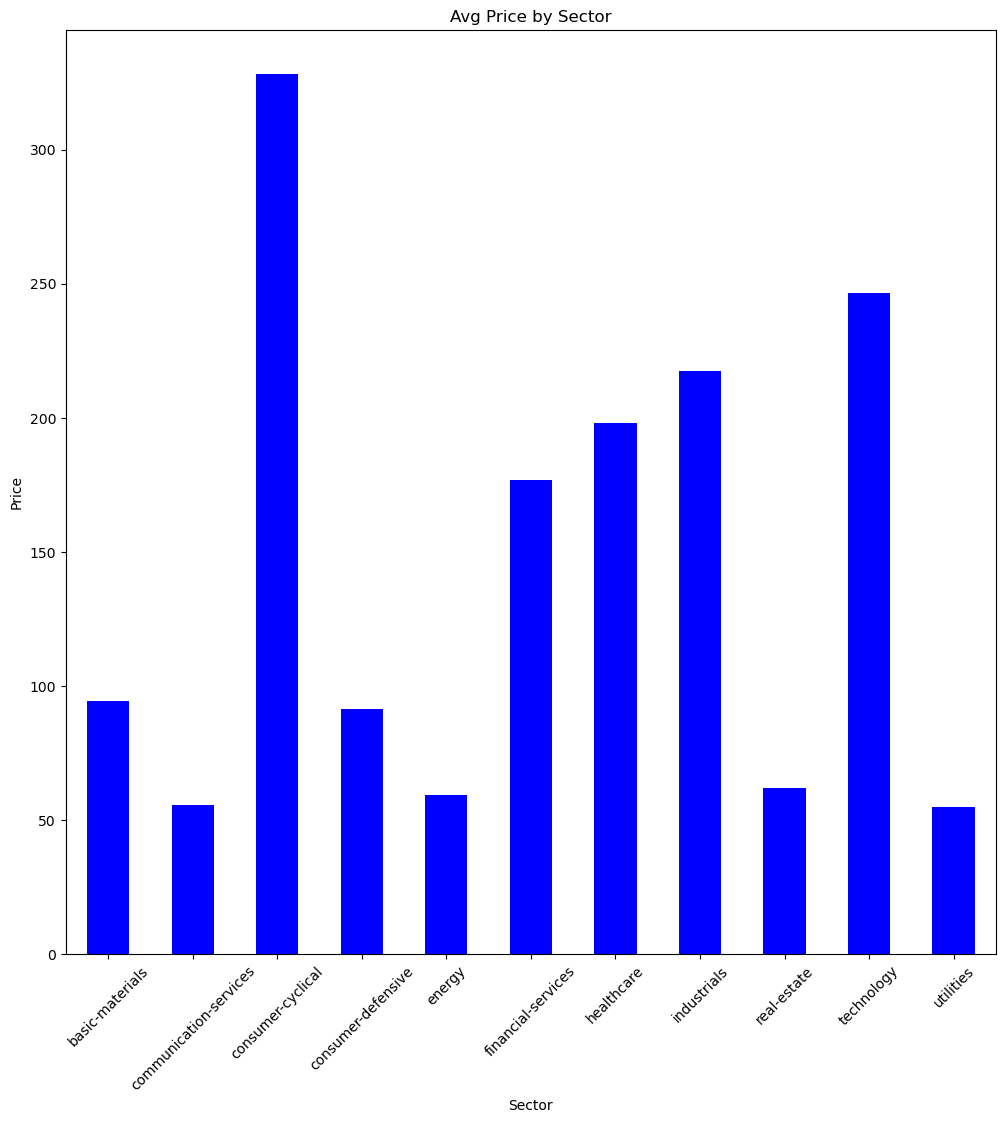

In [23]:
market_cap_by_sector = stock_data.groupby('Sector')['Current Price'].mean()
market_cap_by_sector.plot(kind='bar', figsize=(12,12), color='blue')
plt.title('Avg Price by Sector')
plt.xlabel('Sector')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('chart_1.jpg',format='jpg')
plt.show()


1) The technology sector shows one of the highest average prices, suggesting it might have several high-priced stocks, possibly due to high growth prospects or market valuation.
2) Utilities and Communication-services sectors show relatively lower average prices, which could indicate either smaller market caps or lower-priced shares in these industries.

## 2) Total market Cap by Sector

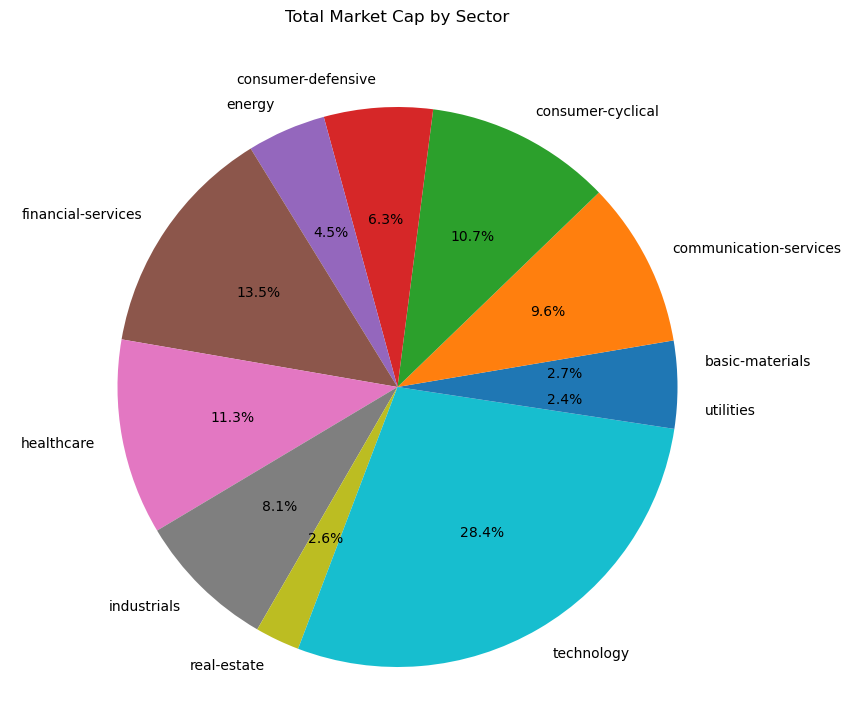

In [65]:
total_market_cap_by_sector = stock_data.groupby('Sector')['Market Cap in Million ($)'].sum()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

plt.figure(figsize=(10,8))
plt.pie(total_market_cap_by_sector, labels=total_market_cap_by_sector.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Total Market Cap by Sector', y=1.08)
plt.savefig('chart_2.jpg',format='jpg')
plt.show()

1) Sector Distribution: The above pie chart illustrates the percentage of total market capitalization contributed by each sector. It shows a clear dominance of certain sectors over others in terms of market size.  
2) Dominant Sector: The Technology sector commands the largest share, accounting for 28.4% of the total market capitalization. This highlights the significant economic impact and investment interest in technology companies.
3) Other Significant Sectors: Following technology, the sectors with considerable shares include:  
    i) Financial Services at 13.5%  
    ii) Healthcare at 11.3%  
    iii) Industrials at 8.1%  
    iv) Consumer Cyclical at 10.7%  
4) Smaller Sectors: Sectors like Utilities and Basic Materials hold smaller portions of the market cap, suggesting they are smaller in scale or less valued in the current market environment.

### i) Finding the largest companies from the dominant sector.

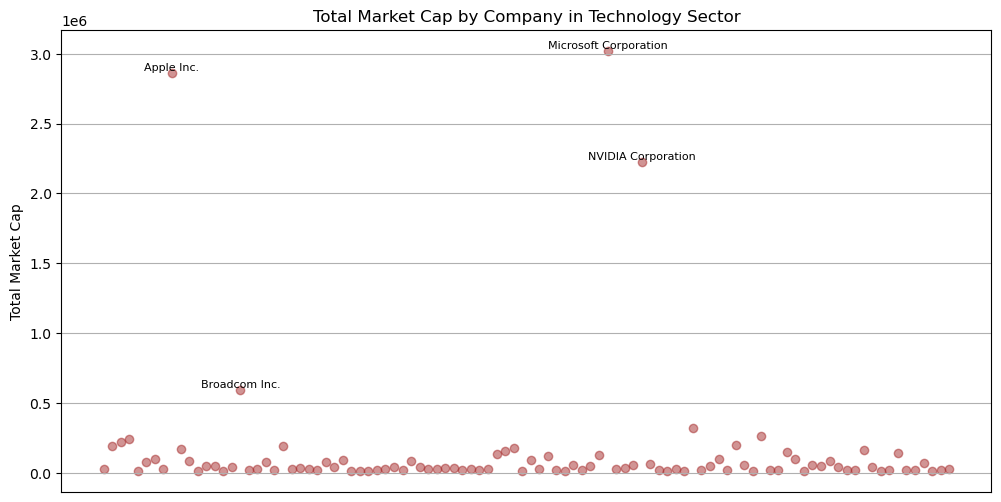

In [96]:
technology_data = stock_data[stock_data['Sector'] == 'technology']

total_market_cap_by_company= technology_data.groupby('Name')['Market Cap in Million ($)'].sum()
Q1 = total_market_cap_by_company.quantile(0.10)
Q3 = total_market_cap_by_company.quantile(0.90)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (total_market_cap_by_company < (Q1 - 1.5 * IQR)) | (total_market_cap_by_company > (Q3 + 1.5 * IQR))

plt.figure(figsize=(12, 6))
plt.scatter(total_market_cap_by_company.index, total_market_cap_by_company.values, color='brown', alpha=0.5)
plt.title('Total Market Cap by Company in Technology Sector')
plt.ylabel('Total Market Cap')
plt.xticks([])  # Remove x-axis labels

# Add annotations for outliers
for company, market_cap in total_market_cap_by_company.items():
    if outliers[company]:
        plt.text(company, market_cap, f'{company}', ha='center', va='bottom', fontsize=8, color='black')

plt.grid(True)
plt.savefig('chart_3.jpg',format='jpg')
plt.show()

from the Above figure we are able to identify four outliers from the dominant sector i.e. Technology in terms of market cap
    these Major companies are  
    1) Microsoft    
    2) Apple  
    3) Nvidia Corporation  
    4) Broadcom Inc.
    
Lets Compare the Market of these 4 companies with the rest of the companies in technology sector

### ii) Comparing the Big 4 technology company with the Technology Sector & Entire Collected data

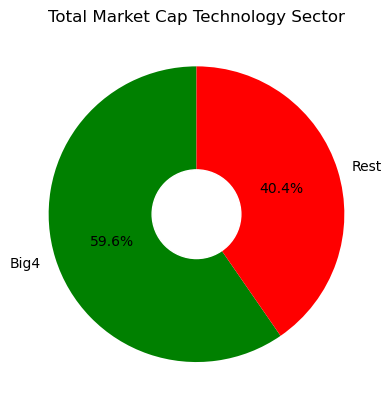

In [128]:
technology_big_4 = technology_data[:4]['Market Cap in Million ($)'] .sum()
technology_rest = technology_data[4:]['Market Cap in Million ($)'] .sum()

technology_market_cap = [technology_big_4,technology_rest]

# Create donut chart
fig, ax = plt.subplots()
ax.pie(technology_market_cap, labels=['Big4','Rest'], colors=colors, autopct='%1.1f%%', startangle=90)
ax.add_artist(plt.Circle((0,0), .3, color='white'))

plt.title('Total Market Cap Technology Sector')
plt.savefig('chart_4.jpg',format='jpg')
plt.show()

1) Distribution of Market Capitalization:
    Big 4 Technology Companies: They hold a significant 59.6% of the total market capitalization in the technology sector, which is highlighted in green. This suggests that these companies have a dominant market presence.  
    Rest of the Technology Sector: The remaining companies together hold 40.4% of the market capitalization, depicted in red. This segment represents a broad array of smaller competitors in the technology industry.
2) Implications for Stakeholders:
    This visualization is particularly useful for investors, analysts, and industry stakeholders who need to understand the concentration of economic power within the technology sector.
    It highlights the significant market influence and stability potentially offered by the "Big 4", which could be a critical factor in investment decisions and market analysis.

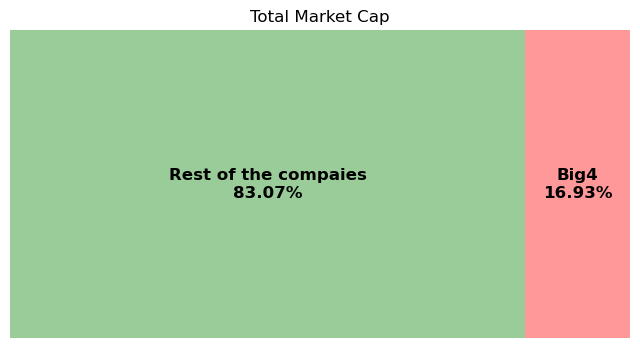

In [139]:
tech_4_filter = (stock_data['Symbol'] != 'MSFT') & (stock_data['Symbol'] != 'AAPL') & (stock_data['Symbol'] != 'NVDA') & (stock_data['Symbol'] != 'AVGO')
rest_market_cap = round((stock_data[tech_4_filter]['Market Cap in Million ($)'].sum() / stock_data['Market Cap in Million ($)'].sum()) * 100,2)
technology_big_4_cent = round((technology_big_4 / stock_data['Market Cap in Million ($)'].sum()) * 100,2)
total_market_cap = [rest_market_cap,technology_big_4_cent]
# Data
labels = [f'Rest of the companies\n{total_market_cap[0]}%', f'Big4\n{total_market_cap[1]}%']
colors = ['green', 'red']

# Create treemap
plt.figure(figsize=(8, 4))
squarify.plot(sizes=total_market_cap, label=labels, color=colors, alpha=0.4, text_kwargs={'fontsize':12, 'weight':'bold'})
plt.axis('off')  # Disable axes
plt.title('Total Market Cap')
plt.savefig('chart_5.jpg',format='jpg')
plt.show()

from the above chart we can infer that:
1) Rest of the Companies: This larger segment, shown in green, accounts for 83.07% of the total market capitalization. This figure indicates that the vast majority of the market cap is distributed among a broader group of companies, suggesting a diverse and extensive sector.

2) Big 4 Companies: The smaller segment in red, representing the "Big 4 companies in the technolgy sector," holds 16.93% of the market cap. Despite being only a small number of companies, this significant percentage underscores their substantial economic influence within the stock Market.

## 3) Total trading Volume by Sector

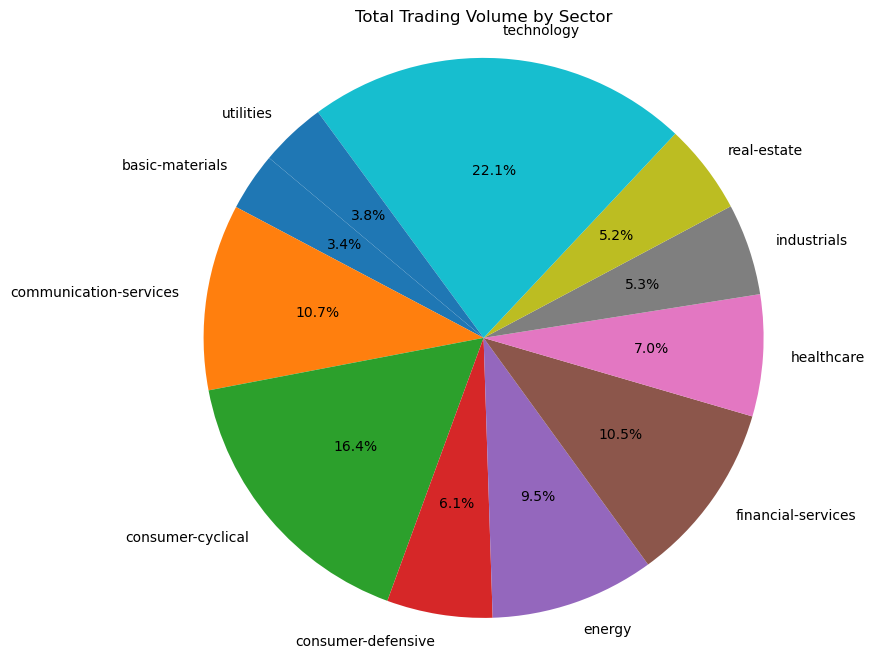

In [135]:
total_volume_by_sector = stock_data.groupby('Sector')['Volume in 000s'].sum()

plt.figure(figsize=(10, 8))
plt.pie(total_volume_by_sector, labels=total_volume_by_sector.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Total Trading Volume by Sector')
plt.savefig('chart_6.jpg',format='jpg')
plt.show()

1) Technology Sector Dominance: The technology sector holds the largest slice at 22.1%, indicating it is the most actively traded sector. This prominence reflects the high interest and dynamic nature of technology companies in the market.
2) Other Significant Sectors:  
    i) Consumer Cyclical: This sector accounts for 16.4% of the total trading volume, showing robust trading activity, likely driven by market trends and consumer behaviors.  
    ii) Financial Services: Representing 10.5%, this sector also sees substantial trading, aligning with its critical role in the economy and sensitivity to economic changes.  
3) Smaller Sectors:  
    i) Utilities: At 3.4%, utilities show the least trading activity, which may be attributed to their stable, less volatile nature.  
    ii) Basic Materials: This sector, at 3.8%, also shows lower trading volumes, which might reflect its less speculative and more steady market perception.  
4) Implications:  
    Market Activity and Volatility: Sectors with higher trading volumes, like technology and consumer cyclical, often experience greater volatility and investor interest, potentially offering higher returns but with increased risk.

## 4) Price Volatility by Sector

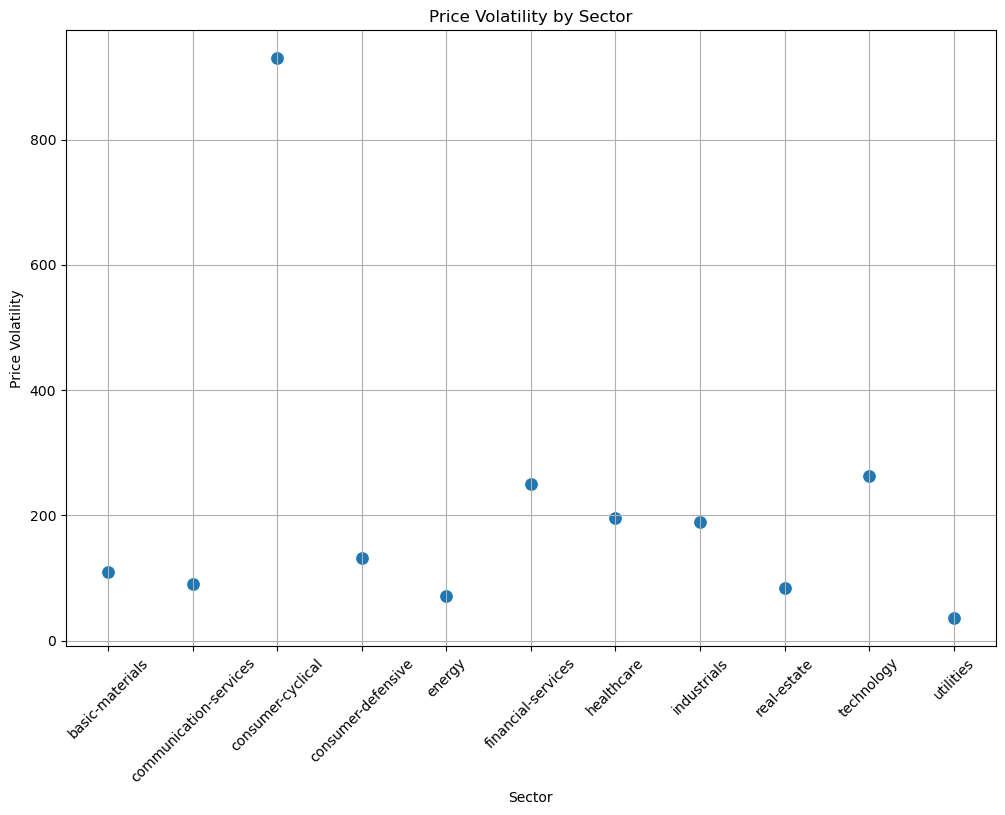

In [137]:
price_volatility = stock_data.groupby('Sector')['Current Price'].std()
price_volatility_df = pd.DataFrame({'Sector': price_volatility.index, 'Price Volatility': price_volatility.values})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=price_volatility_df, x='Sector', y='Price Volatility', s=100)
plt.title('Price Volatility by Sector')
plt.xlabel('Sector')
plt.ylabel('Price Volatility')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('chart_7.jpg',format='jpg')
plt.show()

1) Key Observations from the Chart:

    i) Volatility Spread:  
    The sectors are spread across a range of volatility values, indicating differing levels of price fluctuations among them.

    ii) Highest Volatility:  
    The technology sector stands out with the highest volatility, marked significantly higher on the y-axis compared to other sectors. This reflects the dynamic and often unpredictable nature of technology stocks, which can be influenced by rapid technological changes, market speculation, and investor sentiment.

    iii) Lowest Volatility:  
    The utilities sector shows the lowest volatility, positioned near the bottom of the y-axis. This is typical for utilities, as they are often considered stable investments due to consistent demand and regulatory protection, resulting in less price fluctuation.

    iv) Moderate Volatility:  
    Sectors like healthcare, industrials, and financial services exhibit moderate volatility, positioned in the middle range of the chart. These sectors might experience moderate fluctuations due to factors like economic cycles, policy changes, and market conditions.

2) Implications:
    Investment Considerations: Investors might use this chart to assess risk associated with different sectors. Sectors with higher volatility, like technology, might offer higher potential returns but come with increased risk. Conversely, sectors like utilities provide more stability, suitable for risk-averse investors.

## 5) Correlation Analysis

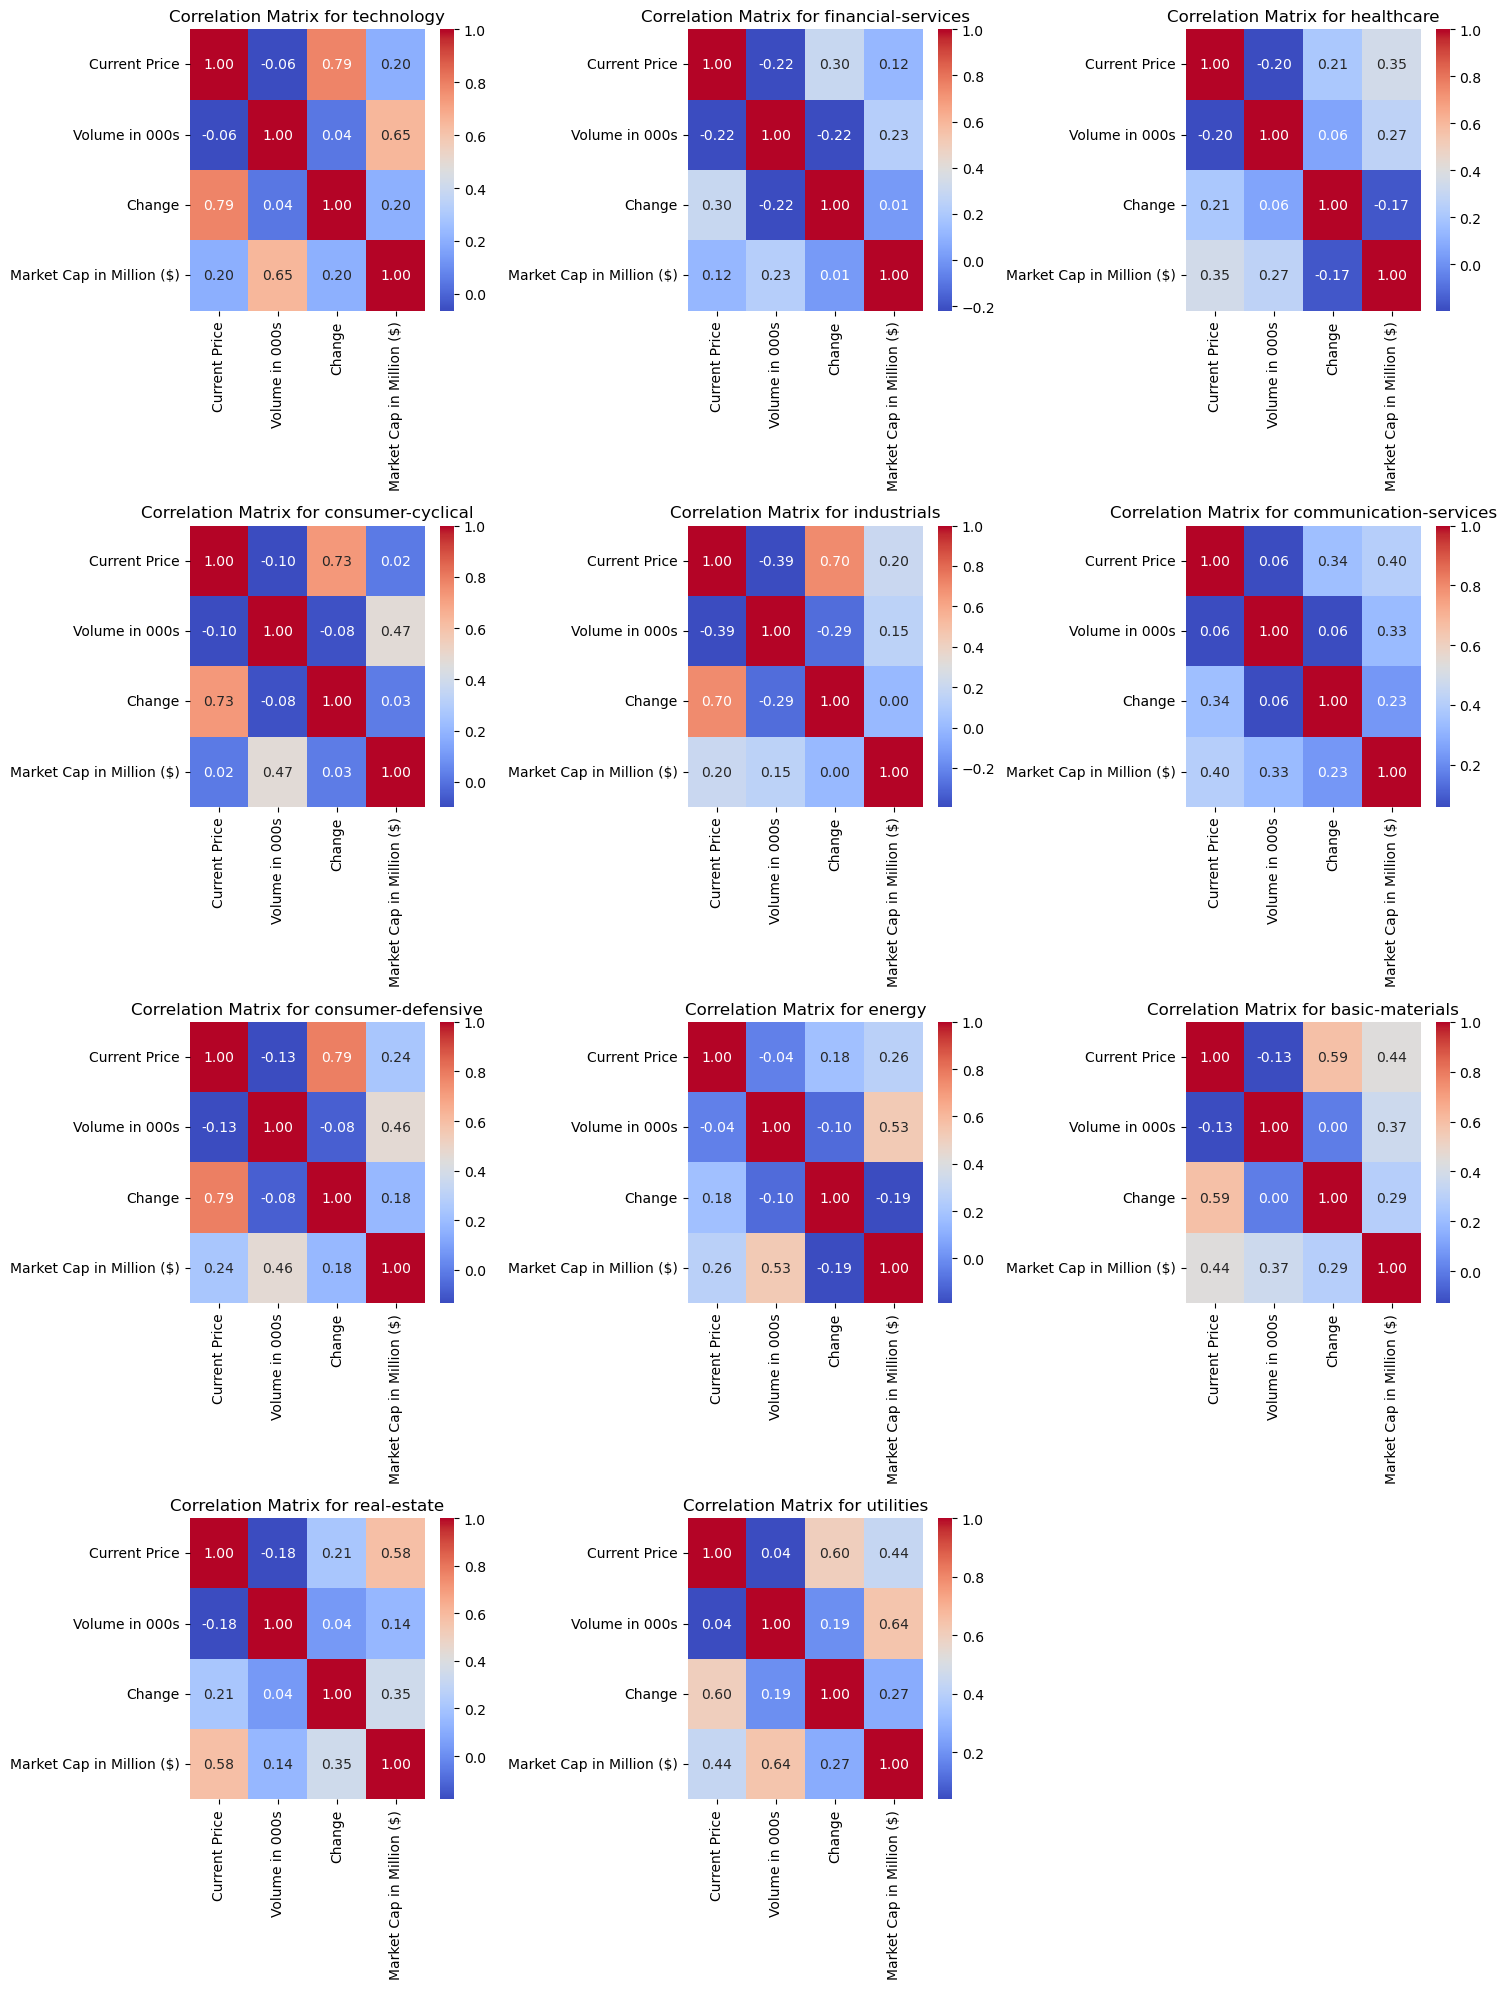

In [138]:
sectors = stock_data['Sector'].unique()  # This extracts unique sectors

# Preparing the correlation data
corr_data = stock_data[['Current Price', 'Volume in 000s', 'Change', 'Market Cap in Million ($)']]

# Calculate the number of rows needed if there are three columns per row
nrows = (len(sectors) + 2) // 3  # Ensures any remainder adds an extra row

# Setup for plotting
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))  # Adjust subplot size accordingly
axs = axs.flatten()  # Flatten the array to make indexing easier

# Generate a heatmap for each sector
for i, sector in enumerate(sectors):
    sector_data = corr_data[stock_data['Sector'] == sector].corr()
    sns.heatmap(sector_data, annot=True, fmt=".2f", cmap='coolwarm', ax=axs[i])
    axs[i].set_title(f'Correlation Matrix for {sector}')

# Turn off axes for any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig('chart_8.jpg',format='jpg')
plt.show()

1)	General Observations Across Sectors:  
    a.	Current Price and Market Cap: Most sectors show a positive correlation between Current Price and Market Cap, suggesting that higher-priced stocks generally have higher market capitalizations. This relationship is typically strong, as seen in sectors like technology and healthcare.  
    b.	Volume and Change: There is a generally positive correlation between trading volume and daily price changes across multiple sectors. This indicates that on days when stock prices change significantly, trading volumes tend to be higher, possibly due to increased investor interest or market reactions.
    
2)	Notable Sector-Specific Insights:  
    a.	Technology: Exhibits strong positive correlations across all metrics, highlighting high activity and significant interdependencies between price, volume, and market cap.  
    b.	Financial Services and Industrials: These sectors show a moderate negative correlation between Volume and Market Cap, which could suggest that larger companies in these sectors might not necessarily have proportionally high trading volumes.  
    c.	Utilities and Real Estate: These sectors generally show lower correlation levels among the metrics, possibly indicating that these traditionally stable sectors are less influenced by daily market fluctuations.
    
3)	Key Takeaways:  
    a.	Volatility and Trading Volume: Sectors with high volatility (like technology and consumer cyclical) often show strong correlations between price changes and trading volume, underscoring the reactive nature of these sectors to market news or economic events.  
    b.	Stability in Utilities and Real Estate: The lower correlations in these sectors may reflect their nature as 'defensive' stocks, which are typically less affected by daily market movements and more influenced by long-term factors.
    
4)	Implications for Investors:
    a.	Investors might use this information to Understand the risk profiles of different sectors based on the volatility reflected in the correlations.
    b.	Make informed decisions on portfolio diversification by considering the correlation patterns which indicate how different sectors might respond to market changes.